In [5]:
import json
import pandas as pd

# Read the JSON file
with open('baseline_result.json', 'r') as f:
    data = json.load(f)

# Extract actual and predicted labels
actual_labels = [item['actual_label'] for item in data]
predicted_labels = [item['predicted_label'] for item in data]

# Create a DataFrame
df = pd.DataFrame({
    'Actual Label': actual_labels,
    'Predicted Label': predicted_labels
})

# Save to CSV
df.to_csv('labels.csv', index=False)

print("CSV file 'labels.csv' has been created.")


CSV file 'labels.csv' has been created.


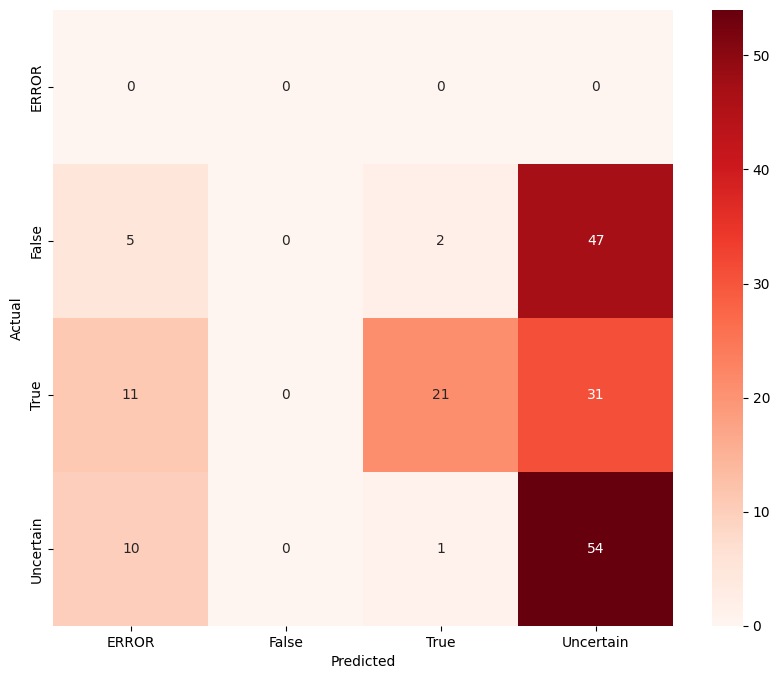

In [4]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('labels.csv')

# Extract actual and predicted labels
actual_labels = df['Actual Label'].tolist()
predicted_labels = df['Predicted Label'].tolist()

# Get unique labels from actual and predicted labels
unique_labels = set(actual_labels + predicted_labels)

# Define the classes (make sure it includes all unique labels)
classes = sorted(unique_labels)  # Sort to keep a consistent order

# Calculate confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels, labels=classes)

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the heatmap as a PNG image
plt.savefig('confusion_matrix.png', format='png', dpi=300)
plt.show()